In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Zero-shot Indirect Effect

### prob

In [2]:
with open('./dataset/intervention_data/gpt2_train=False_prob.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [3]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=False_Total.csv')
positive_effect = total_data.loc[total_data['prob']>0].index
negative_effect = total_data.loc[total_data['prob']<0].index

In [4]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [5]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [6]:
df_list = []
mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        df_list.append(df)
        mean_df+=df

        v_arr = np.array(v)
        var_arr[idx,:,:] = v_arr
var_df = pd.DataFrame(var_arr.std(axis=0), index = neuron, columns=layer)
mean_df = mean_df/len(positive_effect)
    

In [7]:
mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,-0.001920,0.000555,0.002410,0.006709,-0.007842,0.005528,0.001991,0.000664,-0.001337,0.000194,0.001497,0.001802,0.001849
neuron 1,-0.000339,-0.004809,-0.000096,-0.001007,0.000386,0.000044,0.001241,0.002994,0.003511,0.001353,0.001091,0.000452,-0.000377
neuron 2,0.000996,0.001901,0.002729,0.005592,0.000784,0.004840,0.000152,0.000822,0.001427,0.001064,0.001092,0.000862,0.001293
neuron 3,0.000802,0.000890,0.000866,0.000311,0.001254,-0.000221,0.000315,0.000840,0.000606,0.000349,0.000551,-0.000233,-0.000235
neuron 4,0.006334,0.002323,-0.004841,0.005699,0.000102,0.000605,0.001765,-0.000257,-0.000299,-0.000203,-0.000242,-0.000915,-0.000881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.001353,0.005268,-0.013184,-0.012512,-0.012130,-0.011011,-0.008198,-0.004822,-0.002278,-0.000269,0.001135,-0.000410,0.000410
neuron 764,-0.004641,0.000157,0.000771,0.000079,-0.000305,0.000435,0.001785,0.000394,-0.000276,-0.002126,-0.003252,-0.001206,-0.001774
neuron 765,0.010079,0.003211,-0.017535,-0.019487,-0.010056,0.000094,0.001641,0.007394,0.004473,0.006041,0.006739,0.000817,0.000450
neuron 766,0.007631,0.002693,0.005686,0.000893,-0.001094,0.000879,0.000133,0.000117,-0.000002,-0.000302,-0.000619,-0.000867,-0.000758


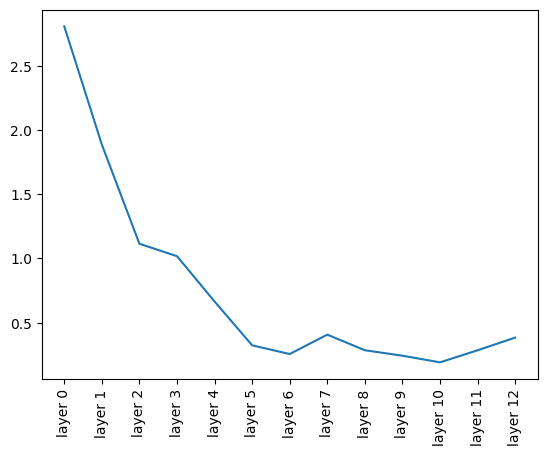

In [8]:
sns.lineplot(mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

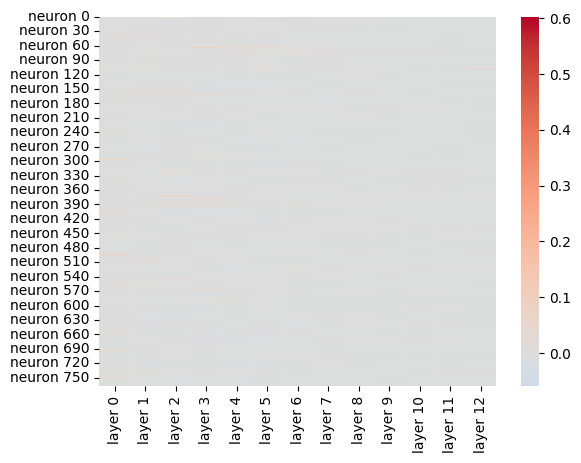

In [9]:
sns.heatmap(mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

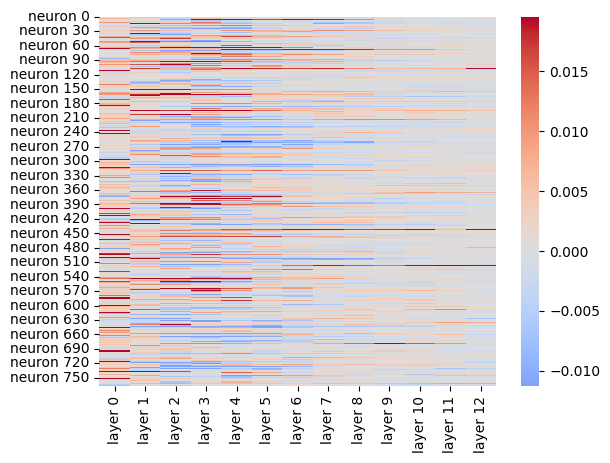

In [10]:
sns.heatmap(mean_df,cmap='coolwarm',robust=True,center=0)

<AxesSubplot: >

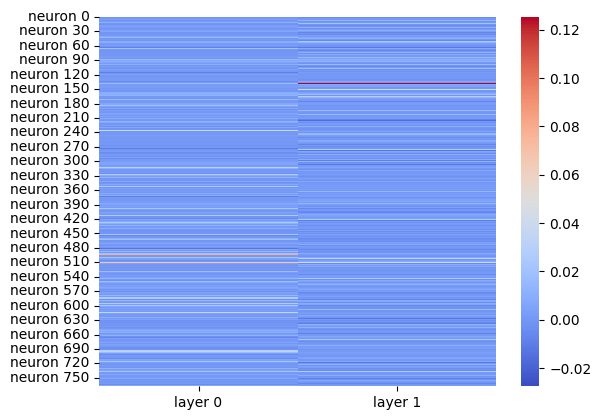

In [11]:
sns.heatmap(mean_df.iloc[:,:2],cmap='coolwarm')

<AxesSubplot: >

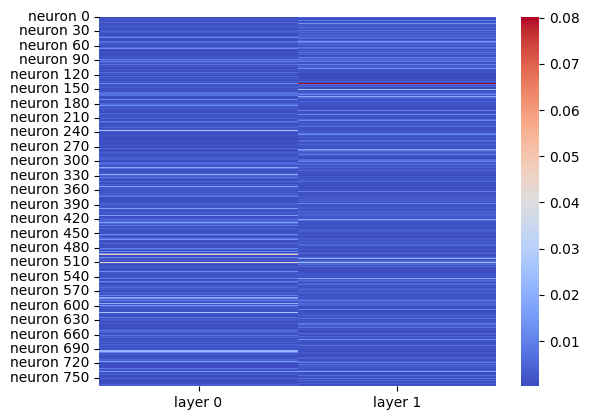

In [12]:
sns.heatmap(var_df.iloc[:,:2],cmap='coolwarm')

## Fine tuning Indirect Effect

### entropy

In [13]:
with open('./dataset/intervention_data/gpt2_train=True_prob.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [14]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=True_Total.csv')
positive_effect = total_data.loc[total_data['prob']>0].index
negative_effect = total_data.loc[total_data['prob']<0].index

In [15]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [16]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [17]:
fine_df_list = []
fine_mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
fine_var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        fine_df_list.append(df)
        fine_mean_df+=df

        v_arr = np.array(v)
        fine_var_arr[idx,:,:] = v_arr
fine_var_df = pd.DataFrame(fine_var_arr.std(axis=0), index = neuron, columns=layer)
fine_mean_df = fine_mean_df/len(positive_effect)
    

In [18]:
len(fine_df_list)

4278

In [19]:
fine_mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,0.000049,0.000122,0.000069,0.000021,-0.000014,0.000051,-0.000127,-0.000240,-0.000230,0.000025,0.000074,0.000201,0.000196
neuron 1,0.000024,-0.000281,-0.000230,0.000083,-0.000271,-0.000223,-0.000266,-0.000340,-0.000151,-0.000159,-0.000131,-0.000145,-0.000125
neuron 2,-0.000146,0.000255,0.000327,-0.000074,-0.000095,0.000254,0.000292,0.000351,0.000567,0.000639,0.000070,0.000251,-0.000054
neuron 3,-0.000731,-0.000036,-0.000057,-0.000127,-0.000049,-0.000066,0.000028,0.000004,0.000012,0.000241,0.000283,0.000200,0.000338
neuron 4,0.000058,0.000063,-0.000213,-0.000435,-0.000309,-0.000291,-0.000186,-0.000156,-0.000092,-0.000175,-0.000507,-0.000790,-0.001212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.000356,0.000271,-0.000128,-0.000348,-0.000475,-0.000685,-0.000861,-0.000510,-0.000588,-0.000363,-0.000153,-0.000005,0.000144
neuron 764,-0.000060,-0.000338,-0.000044,0.000167,-0.000053,-0.000113,-0.000244,-0.000146,-0.000127,-0.000228,-0.000334,-0.000687,-0.000701
neuron 765,0.000210,-0.000057,-0.000066,0.000074,0.000125,0.000253,0.000570,0.000836,0.001194,0.001534,0.001423,0.001643,0.002334
neuron 766,0.002283,0.000187,0.000161,-0.000017,0.000086,0.000052,0.000055,-0.000012,0.000015,0.000039,0.000044,-0.000040,-0.000144


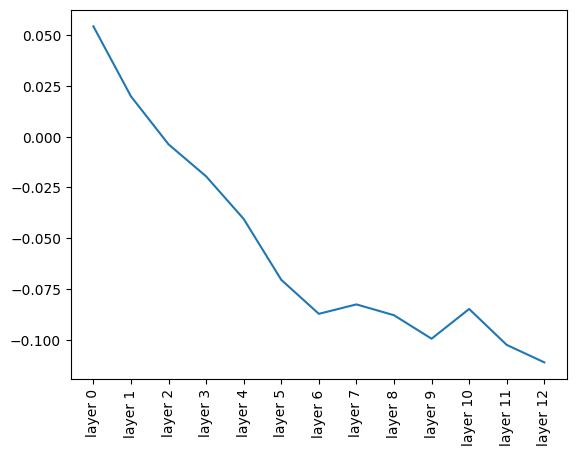

In [20]:
sns.lineplot(fine_mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

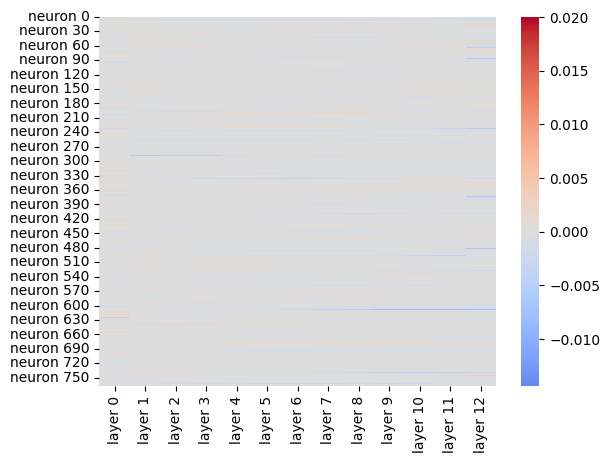

In [21]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

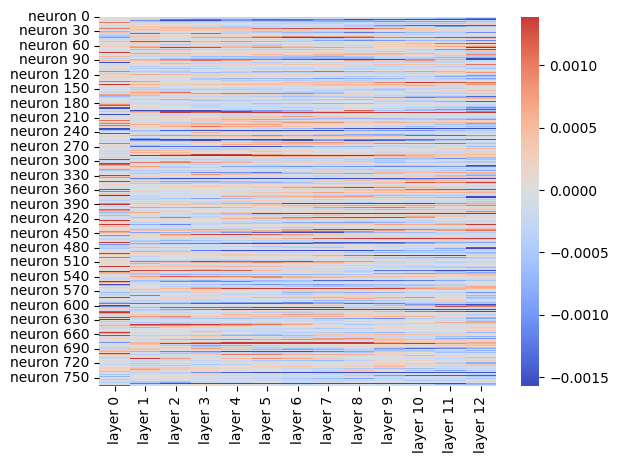

In [22]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

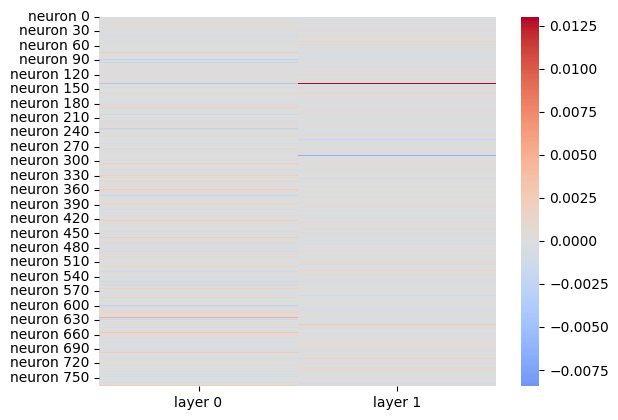

In [23]:
sns.heatmap(fine_mean_df.iloc[:,:2],cmap='coolwarm',center=0)

<AxesSubplot: >

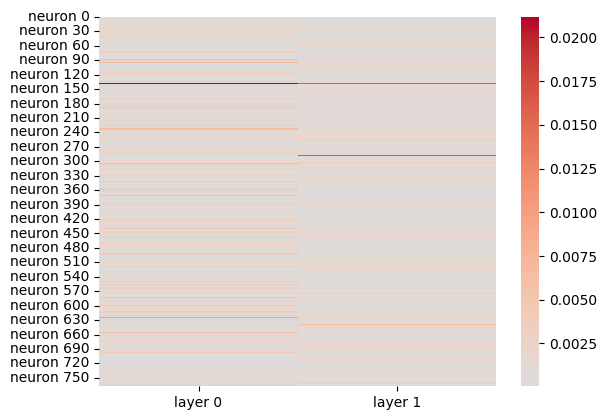

In [24]:
sns.heatmap(fine_var_df.iloc[:,:2],cmap='coolwarm',center=0)

### Fine tuning 전,후 비교

In [25]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 494    0.077566
neuron 752    0.067275
neuron 510    0.067067
neuron 297    0.062707
neuron 65     0.043111
neuron 236    0.037051
neuron 264    0.036468
neuron 345    0.036072
neuron 614    0.035314
neuron 572    0.034450
neuron 695    0.033443
neuron 162    0.032824
neuron 313    0.030684
neuron 437    0.030517
neuron 364    0.029331
neuron 693    0.028570
neuron 583    0.028563
neuron 177    0.028053
neuron 233    0.027732
neuron 327    0.027253
Name: layer 0, dtype: float64

neuron 138    0.125415
neuron 372    0.092492
neuron 92     0.088968
neuron 503    0.067357
neuron 48     0.055018
neuron 35     0.049503
neuron 510    0.039143
neuron 151    0.038778
neuron 615    0.031738
neuron 264    0.031472
neuron 502    0.030596
neuron 165    0.028655
neuron 164    0.027988
neuron 275    0.027081
neuron 737    0.026939
neuron 544    0.026056
neuron 421    0.024532
neuron 430    0.023933
neuron 441    0.023879
neuron 67     0.023750
Name: layer 1, dtype: float64

In [26]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 625    0.005369
neuron 264    0.005142
neuron 362    0.004300
neuron 181    0.003620
neuron 106    0.003185
neuron 656    0.003143
neuron 233    0.002808
neuron 243    0.002786
neuron 359    0.002617
neuron 432    0.002544
neuron 185    0.002528
neuron 423    0.002469
neuron 188    0.002440
neuron 426    0.002435
neuron 141    0.002368
neuron 262    0.002331
neuron 458    0.002301
neuron 572    0.002297
neuron 74     0.002287
neuron 766    0.002283
Name: layer 0, dtype: float64

neuron 138    0.013015
neuron 92     0.004112
neuron 570    0.003138
neuron 639    0.002330
neuron 532    0.001992
neuron 526    0.001841
neuron 399    0.001750
neuron 264    0.001705
neuron 710    0.001616
neuron 233    0.001558
neuron 527    0.001362
neuron 441    0.001328
neuron 596    0.001299
neuron 51     0.001288
neuron 35     0.001241
neuron 102    0.001190
neuron 343    0.001144
neuron 508    0.001092
neuron 478    0.001068
neuron 152    0.001044
Name: layer 1, dtype: float64

In [27]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 576   -0.004857
neuron 419   -0.004989
neuron 628   -0.005070
neuron 454   -0.005084
neuron 135   -0.005125
neuron 355   -0.005502
neuron 666   -0.006059
neuron 447   -0.007245
neuron 480   -0.007996
neuron 87    -0.008037
neuron 64    -0.008070
neuron 40    -0.008100
neuron 395   -0.009120
neuron 273   -0.009126
neuron 115   -0.009234
neuron 373   -0.009447
neuron 622   -0.010468
neuron 266   -0.012880
neuron 38    -0.013689
neuron 481   -0.013771
Name: layer 0, dtype: float64

neuron 658   -0.009534
neuron 547   -0.009696
neuron 298   -0.009868
neuron 578   -0.010524
neuron 644   -0.010791
neuron 331   -0.011052
neuron 627   -0.011611
neuron 586   -0.011813
neuron 64    -0.011850
neuron 307   -0.011975
neuron 729   -0.012157
neuron 718   -0.013016
neuron 250   -0.013235
neuron 278   -0.013447
neuron 740   -0.014450
neuron 160   -0.014460
neuron 215   -0.015580
neuron 169   -0.016500
neuron 322   -0.020247
neuron 526   -0.027526
Name: layer 1, dtype: float64

In [28]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 663   -0.001285
neuron 345   -0.001477
neuron 341   -0.001495
neuron 100   -0.001531
neuron 529   -0.001553
neuron 9     -0.001641
neuron 364   -0.001725
neuron 203   -0.001775
neuron 401   -0.001813
neuron 556   -0.001881
neuron 550   -0.001902
neuron 191   -0.001961
neuron 629   -0.002121
neuron 371   -0.002229
neuron 95    -0.002388
neuron 600   -0.002427
neuron 232   -0.002740
neuron 88    -0.002894
neuron 337   -0.003671
neuron 138   -0.004240
Name: layer 0, dtype: float64

neuron 514   -0.000908
neuron 50    -0.000960
neuron 8     -0.000989
neuron 257   -0.000989
neuron 641   -0.001010
neuron 630   -0.001011
neuron 746   -0.001055
neuron 653   -0.001128
neuron 579   -0.001160
neuron 553   -0.001163
neuron 312   -0.001186
neuron 336   -0.001212
neuron 762   -0.001232
neuron 360   -0.001339
neuron 270   -0.001351
neuron 721   -0.001397
neuron 255   -0.001735
neuron 195   -0.002425
neuron 288   -0.006470
neuron 393   -0.008448
Name: layer 1, dtype: float64

# Result
- fine tuning 이후에는 model confidence에 대한 영향력을 골고루 나눠 가짐